In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

from cz.io import Data

from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
data = Data() # Load the data

In [3]:
data.data.date.unique().shape[0] == data.data.shape[0] # Check if there is multiple datapoint with same time

True

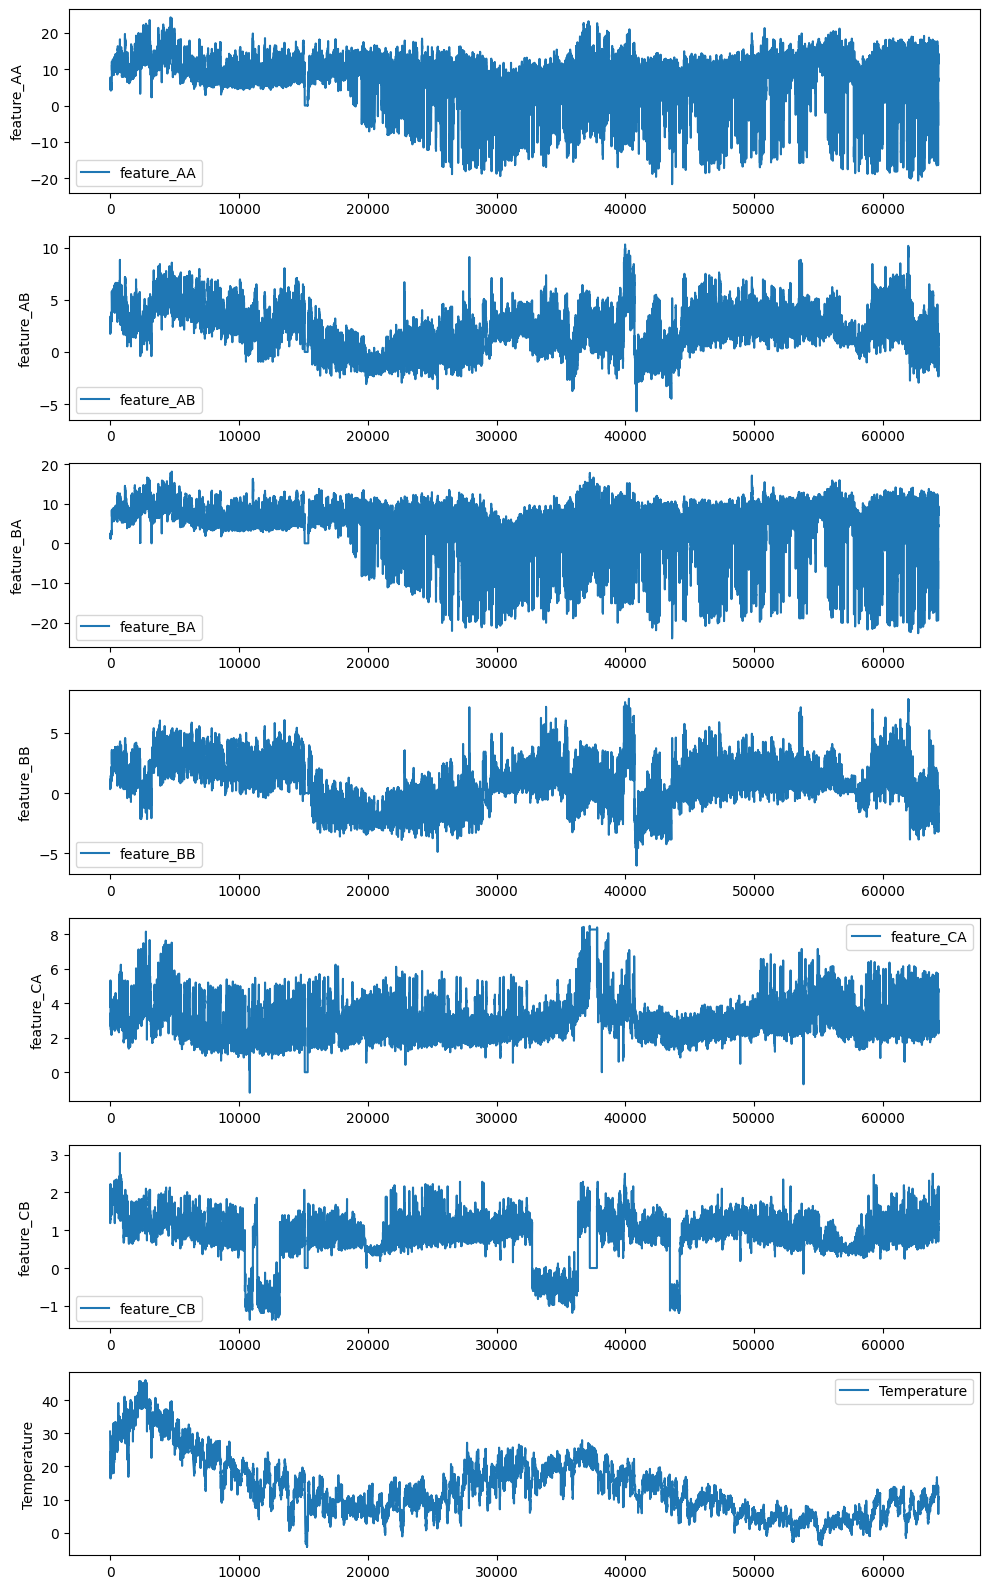

In [59]:
var_list = ["feature_AA","feature_AB","feature_BA","feature_BB","feature_CA","feature_CB","Temperature"]

fig, ax = plt.subplots(len(var_list),1 , figsize= (10, 16))
for i, var in enumerate(var_list):
    sns.lineplot(data.data[var], ax =ax[i], label = var)
plt.tight_layout()
plt.savefig("images/var.png")
plt.show()

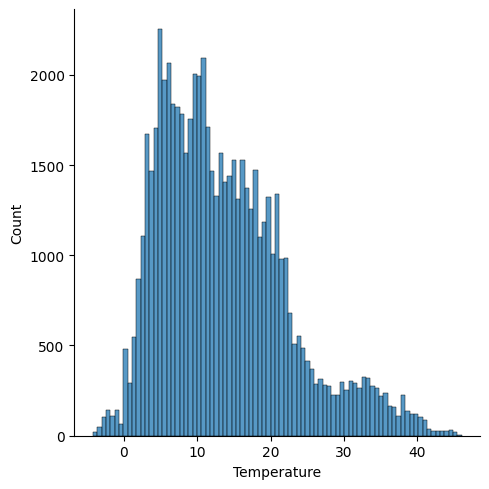

In [4]:
sns.displot(data.data.Temperature)
plt.savefig("images/temperature_distribution.png")
plt.show()

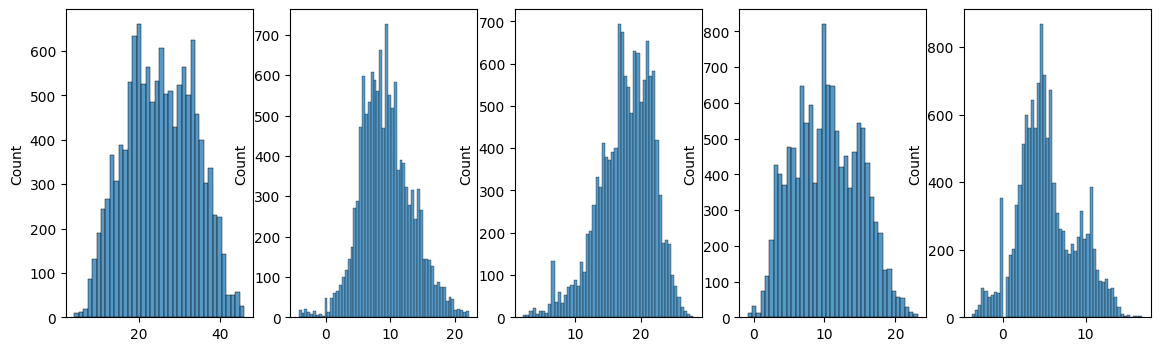

In [50]:
# Let us check for the distribution shift in the data

y = data.data.Temperature.values

n_split = 5
y_list = np.split(y, n_split)

fig, ax = plt.subplots(1, n_split, figsize=(14,4))
for s in range(n_split):
    sns.histplot(y_list[s], ax=ax[s])

plt.savefig("images/temperature_distribution_time.png")
plt.show()

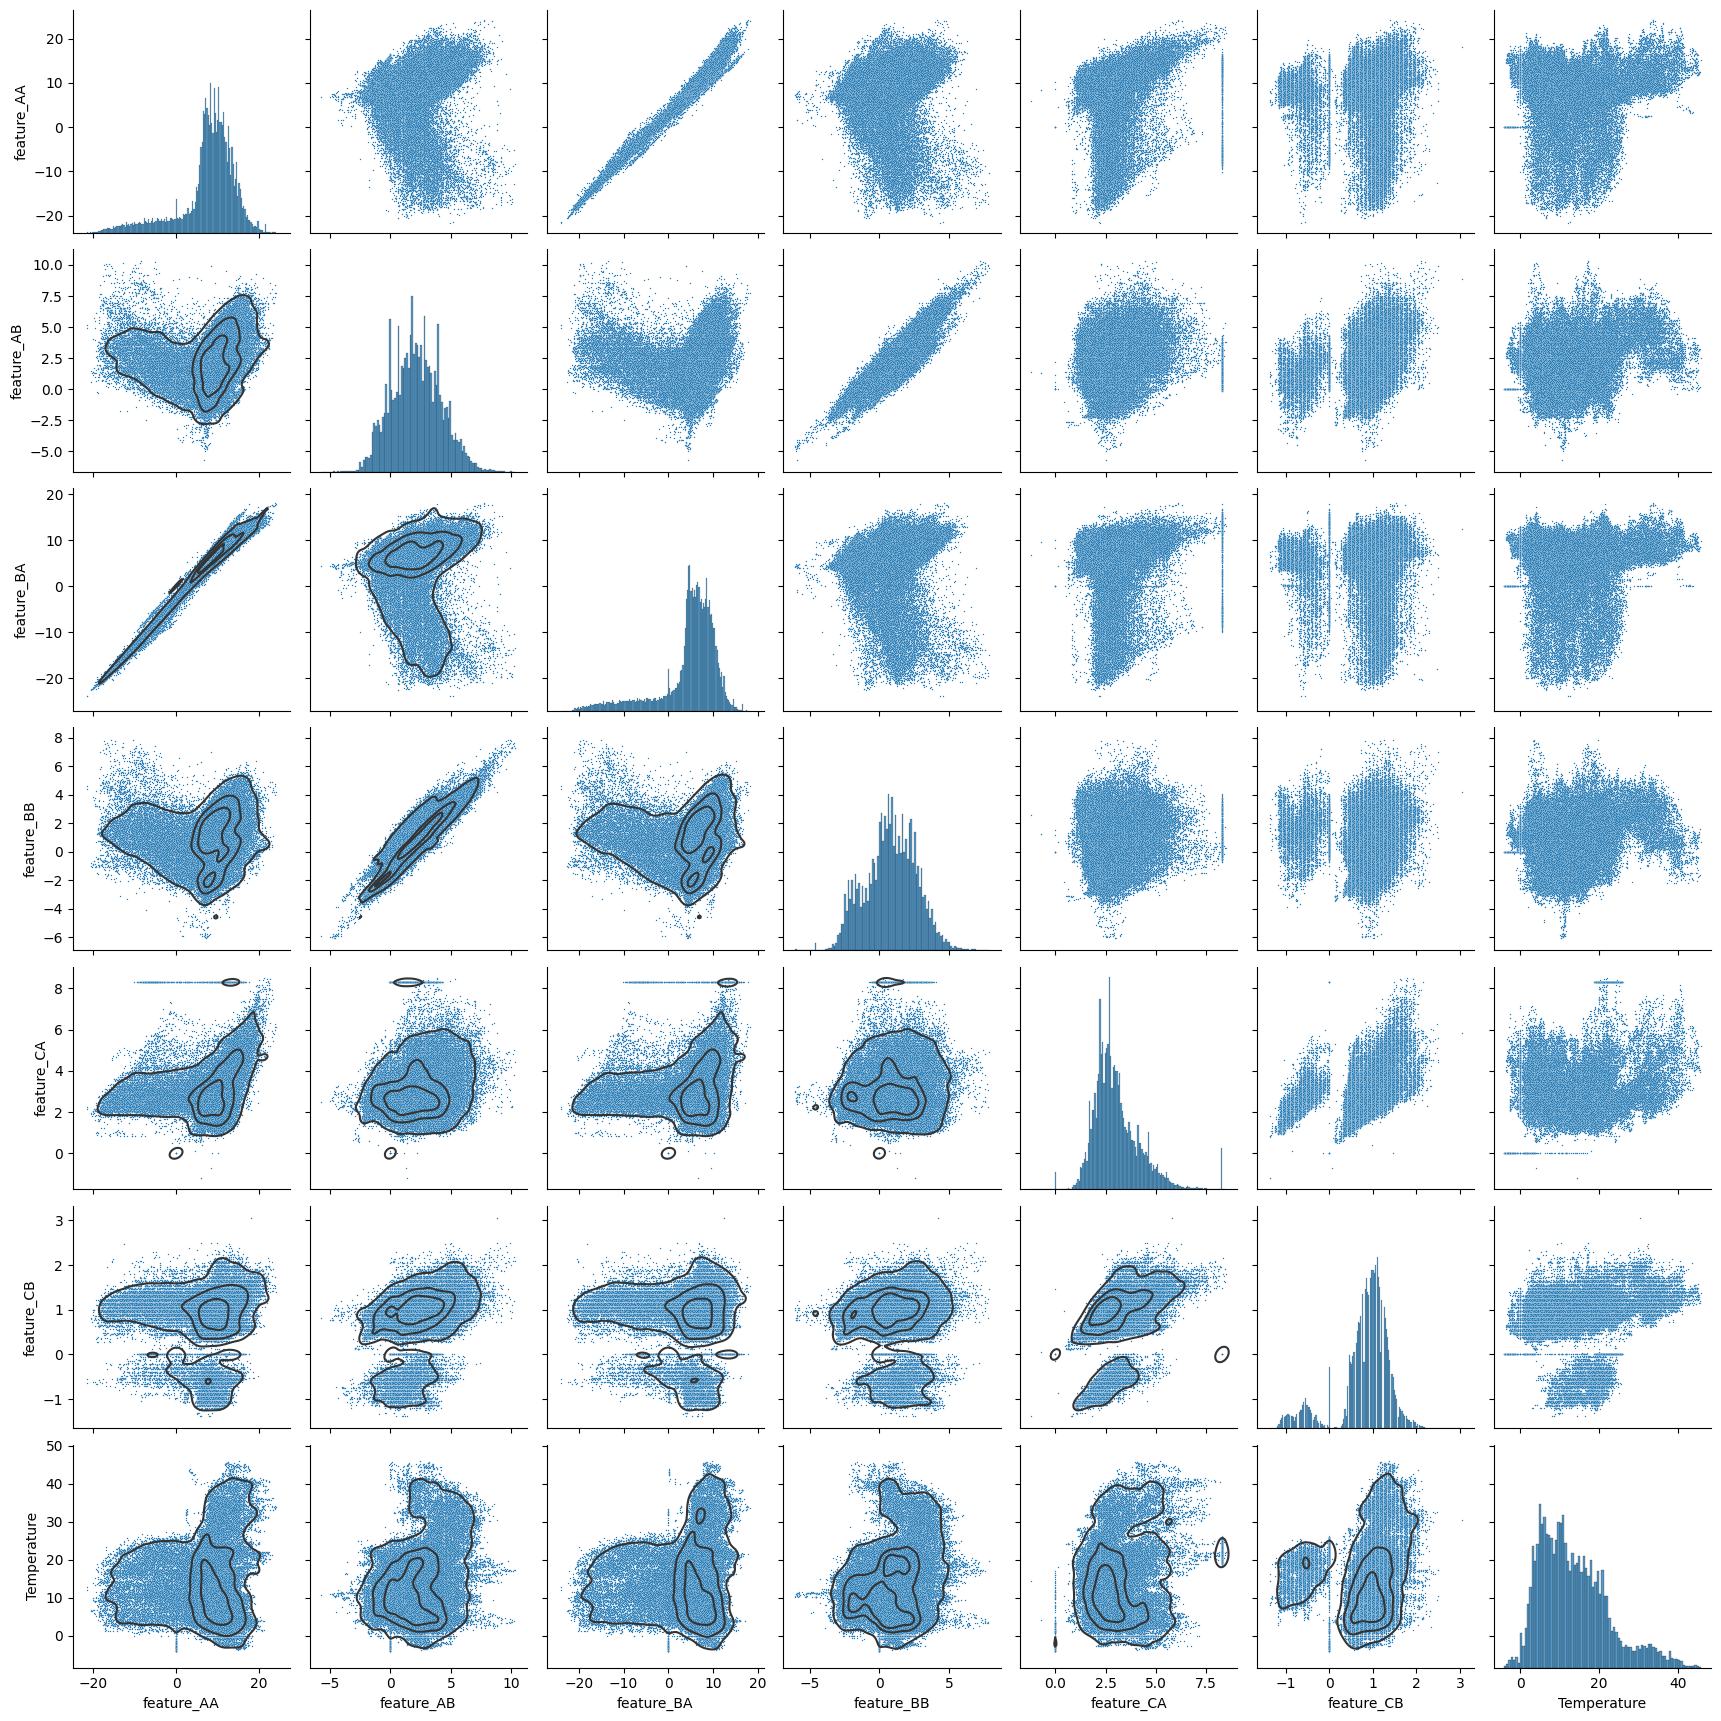

In [64]:
g = sns.pairplot(data.data.drop("id", axis="columns"), plot_kws={"s": 1})
#g.map_lower(sns.kdeplot, levels=4, color=".2") # This takes a long time 
plt.savefig("images/pairplot.png")
plt.show()

In [25]:
train_x = data.train_data.drop(["id", "date"], axis="columns").values[:,:-1]
train_x.shape

(51456, 6)

In [26]:
train_y = data.train_data.drop(["id", "date"], axis="columns").values[:,-1]
train_y.shape

(51456,)

In [29]:
reg = LinearRegression().fit(train_x,train_y )

In [34]:
val_x = data.val_data.drop(["id", "date"], axis="columns").values[:,:-1]
val_x.shape

(12864, 6)

In [35]:
val_y = data.val_data.drop(["id", "date"], axis="columns").values[:,-1]
val_y.shape

(12864,)

In [38]:
val_y_pred = reg.predict(val_x)
train_y_pred = reg.predict(train_x)


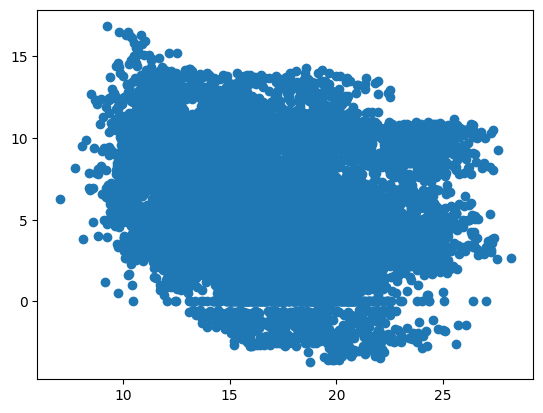

In [40]:
plt.scatter(val_y_pred, val_y)
plt.show()

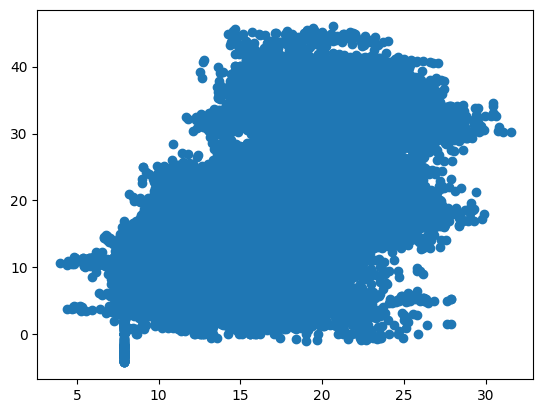

In [41]:
plt.scatter(train_y_pred, train_y)
plt.show()